In [ ]:
import pandas as pd
import sklearn as sk

Substitua `dataset_link` pelo dataset de sua escolha

In [ ]:
# Usa o dataset 'annealing'
dataset_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data'

# Carrega o dataset para um DataFrame do Pandas
df = pd.read_csv(dataset_link, header = None)

# Renomeia a coluna que será usada para a classificação
df.rename(columns={38: 'CLASS'}, inplace=True)

# Impime as primeiras linhas para verificação
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,CLASS
0,?,C,A,8,0,?,S,?,0,?,?,G,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,?,E,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,Y,?,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,?,E,?,?,Y,?,B,?,?,?,?,?,?,?,?,?,?,?,?,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,M,?,?,?,?,?,?,?,?,?,?,?,?,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,?,G,?,?,?,?,B,Y,?,?,?,Y,?,?,?,?,?,?,?,?,?,SHEET,0.801,255.0,269,?,0,?,3


Solucionamos os valores faltando (?) substituindo eles pela moda da coluna

In [ ]:
from sklearn.impute import SimpleImputer

# Substituí os valores faltando (?) pela moda daquela coluna
imp = SimpleImputer(missing_values='?', strategy='most_frequent')
imp.fit(df)
df_no_missing = imp.transform(df)
df = pd.DataFrame(df_no_missing)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,TN,C,A,8,0,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,0.7,610,0,Y,0,3,3
1,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,3.2,610,0,Y,0,3,3
2,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.7,1300,762,Y,0,3,3
3,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,M,Y,C,P,Y,Y,Y,B,Y,COIL,2.801,385.1,0,Y,0,3,3
4,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.801,255,269,Y,0,3,3


Remova as colunas que não deseja passando o indice delas para `drop` (use a váriavel boleana e a array para remover as colunas)

In [ ]:
# Marca se e quais colunas devem ser dropadas
drop_col = False
cols_to_drop = [0]

# Remove colunas do DataFrame pois elas não são úteis ao modelo
if drop_col:
  df = df.drop(cols_to_drop, axis=1)

# Imprime as primeiras linhas para verificação
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,TN,C,A,8,0,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,0.7,610,0,Y,0,3,3
1,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,3.2,610,0,Y,0,3,3
2,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.7,1300,762,Y,0,3,3
3,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,M,Y,C,P,Y,Y,Y,B,Y,COIL,2.801,385.1,0,Y,0,3,3
4,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.801,255,269,Y,0,3,3


Separa a coluna que vai servir para a classificação, passe o índice dela considerando as colunas que já fora dropadas

In [ ]:
# Renomeia a coluna que será usada para a classificação DE NOVO porque algumas 
# funções do pré-processamento removem esse nome
df.rename(columns={32: 'CLASS'}, inplace=True)

# Separa a "classe" do resto do DataFrame
y = df[['CLASS']]

# Imprime as primeiras linhas para verificação
y.head()

,CLASS
0,3
1,3
2,3
3,3
4,3


Remove a coluna que foi separada para ser a "classe"

In [ ]:
# Remove a coluna "class" que foi separada, mantendo somente as features
X = df.drop(['CLASS'], axis = 1)

# Imprime as primeiras linhas para verificação
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,TN,C,A,8,0,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,0.7,610,0,Y,0,3
1,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,COIL,3.2,610,0,Y,0,3
2,TN,C,R,0,0,T,S,2,0,N,P,E,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.7,1300,762,Y,0,3
3,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,M,Y,C,P,Y,Y,Y,B,Y,COIL,2.801,385.1,0,Y,0,3
4,TN,C,A,0,60,T,S,2,0,N,P,G,2,Y,Y,Y,B,Y,C,P,Y,Y,Y,B,Y,SHEET,0.801,255,269,Y,0,3


Converte os dados categóricos para dados numéricos para que eles possam ser usados com o sklearn

In [ ]:
# Colunas com dados categóricos
categorical_cols = [0, 1, 2, 4, 5, 6, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 29]

# Impime as primeiras linhas para verificação
X = pd.get_dummies(X, columns=categorical_cols)

# Imprime as primeiras linhas para verificação
X.head()

,3,7,8,12,26,27,28,30,31,0_TN,0_ZS,1_C,2_A,2_K,2_M,2_R,2_S,2_V,2_W,4_0,4_45,4_50,4_60,4_70,4_80,4_85,5_T,6_A,6_S,9_N,10_P,11_D,11_E,11_F,11_G,13_Y,14_Y,15_Y,16_B,16_M,17_Y,18_C,19_P,20_Y,21_Y,22_Y,23_B,23_C,23_V,24_Y,25_COIL,25_SHEET,29_N,29_Y
0,8,2,0,2,0.7,610,0,0,3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1
1,0,2,0,2,3.2,610,0,0,3,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,1,0,0,1
2,0,2,0,2,0.7,1300,762,0,3,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1
3,0,2,0,2,2.801,385.1,0,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,1
4,0,2,0,2,0.801,255,269,0,3,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,1,0,1,0,1


Faz o pré-processamento dos dados necessários como por exemplo a normalização (marque as variáveis como true para fazer o pré-processamento)

In [ ]:
from sklearn import preprocessing

# Marca se os dados devem ser normalizados ou não
normalize = True

# Faz a normalização dos dados se necessário
if normalize:
  min_max_scaler = preprocessing.MinMaxScaler()
  X_normalized = min_max_scaler.fit_transform(X)
  X = pd.DataFrame(X_normalized)

# Imprime as primeiras linhas para verificação
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
0,0.114286,0.25,0.0,1.0,0.120000,0.400000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.000000,0.25,0.0,1.0,0.786667,0.400000,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.25,0.0,1.0,0.120000,0.852459,0.156148,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.000000,0.25,0.0,1.0,0.680267,0.252525,0.000000,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.000000,0.25,0.0,1.0,0.146933,0.167213,0.055123,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Cria a árvore de decisão e faz o 10-fold cross-validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# Cria a árvore de decisão
dt = DecisionTreeClassifier(min_impurity_decrease=0.01)

# Faz a 10-fold cross-validation
scores = cross_validate(dt, X, y, cv=10, return_estimator=True)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_score'].mean(), scores['test_score'].std() * 2)) # 95% confidence

Accuracy: 0.86 (+/- 0.08)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Mostra a melhor arvore de decisão na tela, lembre de substituir o nome das classes

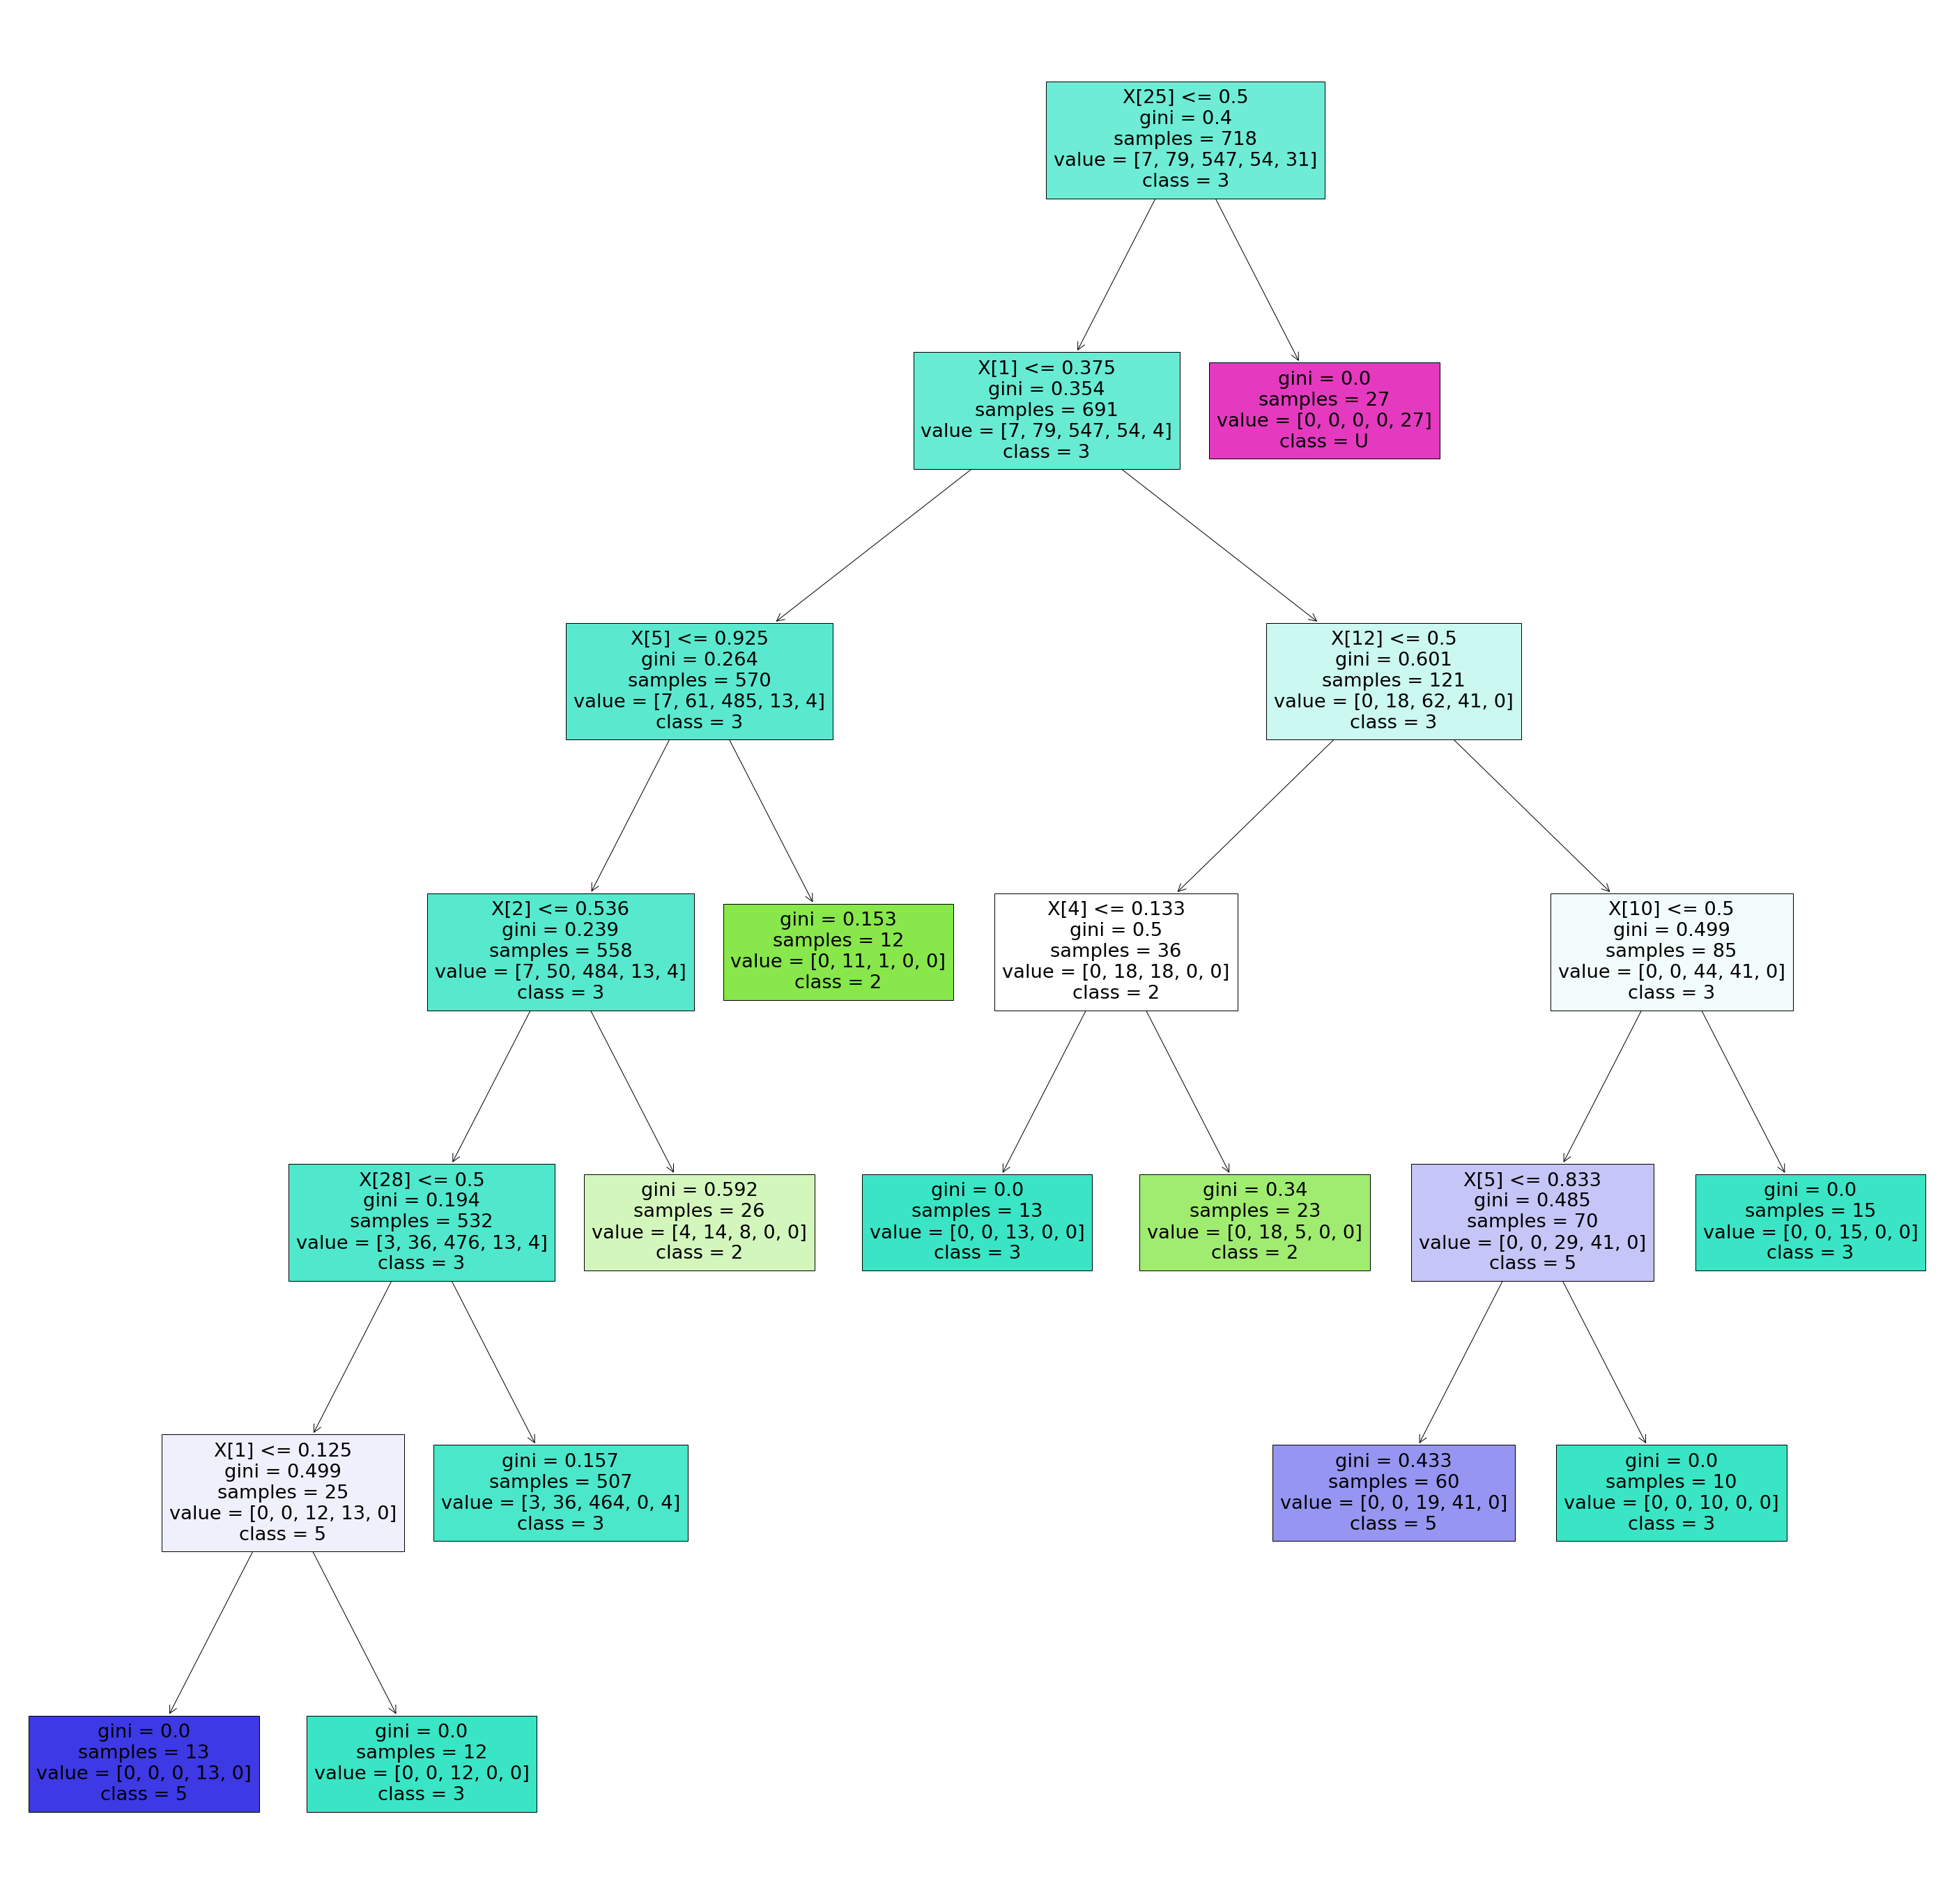

In [63]:
import matplotlib.pyplot as plt
from sklearn import tree

# Mostra a melhor árvore de decisão
max_score = scores['test_score'].max()
for i in range(len(scores['test_score'])):
  if scores['test_score'][i] == max_score:
    best_dt = scores['estimator'][i]

# Exibe a árvore
cn = ['1', '2', '3', '5', 'U']
fig, ax = plt.subplots(figsize=(50, 50)) 
tree.plot_tree(best_dt, class_names=cn, filled = True);
plt.show()